# > **`Author: Badal Parmar`**

# > **`Agglomerative Algorithm`**

In [ ]:
import numpy as np
import pandas as pd
import warnings
import pprint
import scipy.cluster.hierarchy
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

## **`Loading the Dataset`**

In [ ]:
dataset = pd.read_csv('USArrests.csv')
dataset_copy = pd.read_csv('USArrests.csv')
dataset_copy.drop(columns=['States'], inplace=True)
dataset.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
usarrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
def euclideanDistance(point1, point2):
  return (np.sum((np.array(point1[1:]).astype('float')-np.array(point2[1:]).astype('float'))**2)**(0.5))

In [ ]:
def transformation(cluster, clusterTranformed):
  for i in cluster:
    if type(i) == np.str_ or type(i) == float or type(i) == int or type(i) == str:
      clusterTranformed.append(cluster)
      break
    clusterTranformed = transformation(i, clusterTranformed)
  return clusterTranformed    

In [ ]:
def minimumDistance(cluster1, cluster2):
  cluster1Transformed = transformation(cluster1, [])
  cluster2Transformed = transformation(cluster2, [])
  distances = [[abs(euclideanDistance(point1, point2)) for point2 in cluster2Transformed] for point1 in cluster1Transformed]
  minDist = distances[0][0]
  for i in distances:
    for j in i:
      if minDist > j:
        minDist = j
  return minDist

In [ ]:
def maximumDistance(cluster1, cluster2):
  cluster1Transformed = transformation(cluster1, [])
  cluster2Transformed = transformation(cluster2, [])
  distances = [[abs(euclideanDistance(point1, point2)) for point2 in cluster2Transformed] for point1 in cluster1Transformed]
  maxDist = distances[0][0]
  for i in distances:
    for j in i:
      if maxDist < j:
        maxDist = j
  return maxDist

In [ ]:
def meanDistance(cluster1, cluster2):
  cluster1Transformed = transformation(cluster1, [])
  cluster2Transformed = transformation(cluster2, [])
  mean1 = np.sum(np.array(cluster1Transformed)[:,1:].astype('float'), axis=0) / len(cluster1Transformed)
  mean2 = np.sum(np.array(cluster2Transformed)[:,1:].astype('float'), axis=0) / len(cluster2Transformed)
  meanDist = abs(euclideanDistance(mean1, mean2))
  return meanDist

In [ ]:
def averageDistance(cluster1, cluster2):
  cluster1Transformed = transformation(cluster1, [])
  cluster2Transformed = transformation(cluster2, [])
  distances = [[abs(euclideanDistance(point1, point2)) for point2 in cluster2Transformed] for point1 in cluster1Transformed]
  averageDist = np.sum(distances) / (len(cluster1Transformed) * len(cluster2Transformed))
  return averageDist

In [ ]:
def agglomerativeClustering(dataset, choiceOfDistance):
  functionOfDistance = None
  if choiceOfDistance == 1:
    functionOfDistance = minimumDistance
  elif choiceOfDistance == 2:
    functionOfDistance = maximumDistance
  elif choiceOfDistance == 3:
    functionOfDistance = meanDistance
  elif choiceOfDistance == 4:
    functionOfDistance = averageDistance
  numberOfIterations = len(dataset) - 1
  heirarchy = []
  clustersHeirarchy = dataset.to_numpy().tolist()
  statesHeirarchy = dataset['States'].to_numpy().tolist()
  for i in range(numberOfIterations):
    minimumDist = []
    for j in range(len(clustersHeirarchy)):
      for k in range(j+1, len(clustersHeirarchy)):
        distance = functionOfDistance(np.array(clustersHeirarchy[j]), np.array(clustersHeirarchy[k]))
        if len(minimumDist) == 0:
          minimumDist.append(distance)
          minimumDist.append(clustersHeirarchy[j])
          minimumDist.append(clustersHeirarchy[k])
          minimumDist.append(statesHeirarchy[j])
          minimumDist.append(statesHeirarchy[k])
        else:
          if minimumDist[0] > distance:
            minimumDist.clear()
            minimumDist.append(distance)
            minimumDist.append(clustersHeirarchy[j])
            minimumDist.append(clustersHeirarchy[k])
            minimumDist.append(statesHeirarchy[j])
            minimumDist.append(statesHeirarchy[k])

    clustersHeirarchy.remove(minimumDist[1])
    clustersHeirarchy.remove(minimumDist[2])
    clustersHeirarchy.append([minimumDist[1], minimumDist[2]])

    statesHeirarchy.remove(minimumDist[3])
    statesHeirarchy.remove(minimumDist[4])
    statesHeirarchy.append([minimumDist[3], minimumDist[4]])

  return statesHeirarchy[0]

Different Types Of Distance Measures: 
	1. Minimum Distance
	2. Maximum Distance
	3. Mean Distance
	4. Average Distance

Which Distance Measure do you want to use ? 1
You have chosen "Minimum Distance" measure

Heirarchy:

[  'North Carolina',
   [  'Florida',
      [  'Alaska',
         [  [  ['California', ['Maryland', ['Arizona', 'New Mexico']]],
               [  [  'Delaware',
                     [  [['Illinois', 'New York'], ['Michigan', 'Nevada']],
                        ['Alabama', 'Louisiana']]],
                  ['Mississippi', 'South Carolina']]],
            [  [  [  ['Missouri', ['Arkansas', 'Tennessee']],
                     [  'Rhode Island',
                        [  [  'Oregon',
                              [  'Washington',
                                 ['Wyoming', ['Oklahoma', 'Virginia']]]],
                           ['Massachusetts', 'New Jersey']]]],
                  ['Georgia', ['Colorado', 'Texas']]],
               [  [  'Idaho',
                     

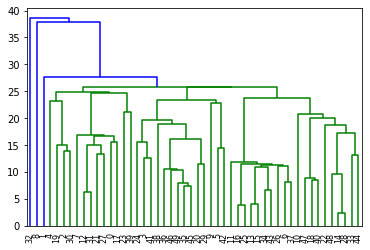


Do you want to re-execute the algorithm ? (yes / no): Yes
Invalid Choice!

Which Distance Measure do you want to use ? (yes / no): yes

--------------------------------------------------------------------------------

Different Types Of Distance Measures: 
	1. Minimum Distance
	2. Maximum Distance
	3. Mean Distance
	4. Average Distance

Which Distance Measure do you want to use ? 2
You have chosen "Maximum Distance" measure

Heirarchy:

[  [  ['Florida', 'North Carolina'],
      [  [  ['Delaware', ['Alabama', 'Louisiana']],
            ['Alaska', ['Mississippi', 'South Carolina']]],
         [  ['Maryland', ['Arizona', 'New Mexico']],
            [  'California',
               [['Illinois', 'New York'], ['Michigan', 'Nevada']]]]]],
   [  [  [  ['Missouri', ['Arkansas', 'Tennessee']],
            ['Georgia', ['Colorado', 'Texas']]],
         [  'Rhode Island',
            [  ['Wyoming', ['Oregon', ['Oklahoma', 'Virginia']]],
               ['Washington', ['Massachusetts', 'New Jersey'

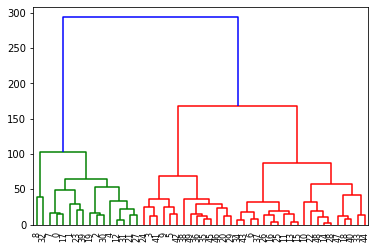


Do you want to re-execute the algorithm ? (yes / no): yes

--------------------------------------------------------------------------------

Different Types Of Distance Measures: 
	1. Minimum Distance
	2. Maximum Distance
	3. Mean Distance
	4. Average Distance

Which Distance Measure do you want to use ? 3
You have chosen "Mean Distance" measure

Heirarchy:

[  [  [  ['California', ['Maryland', ['Arizona', 'New Mexico']]],
         [  [  ['Alabama', ['Delaware', 'Louisiana']],
               [['Illinois', 'New York'], ['Michigan', 'Nevada']]],
            ['Alaska', ['Mississippi', 'South Carolina']]]],
      ['Florida', 'North Carolina']],
   [  [  [  ['Missouri', ['Arkansas', 'Tennessee']],
            ['Georgia', ['Colorado', 'Texas']]],
         [  'Rhode Island',
            [  ['Massachusetts', 'New Jersey'],
               [  'Washington',
                  ['Oregon', ['Wyoming', ['Oklahoma', 'Virginia']]]]]]],
      [  [  ['Idaho', ['Kentucky', 'Montana']],
            [  ['Oh

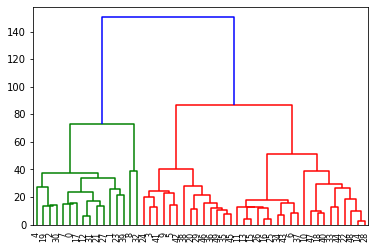


Do you want to re-execute the algorithm ? (yes / no): yes

--------------------------------------------------------------------------------

Different Types Of Distance Measures: 
	1. Minimum Distance
	2. Maximum Distance
	3. Mean Distance
	4. Average Distance

Which Distance Measure do you want to use ? 4
You have chosen "Average Distance" measure

Heirarchy:

[  [  ['Florida', 'North Carolina'],
      [  ['California', ['Maryland', ['Arizona', 'New Mexico']]],
         [  [  ['Delaware', ['Alabama', 'Louisiana']],
               [['Illinois', 'New York'], ['Michigan', 'Nevada']]],
            ['Alaska', ['Mississippi', 'South Carolina']]]]],
   [  [  [  ['Washington', ['Oregon', ['Wyoming', ['Oklahoma', 'Virginia']]]],
            ['Rhode Island', ['Massachusetts', 'New Jersey']]],
         [  ['Missouri', ['Arkansas', 'Tennessee']],
            ['Georgia', ['Colorado', 'Texas']]]],
      [  [  ['Idaho', ['Nebraska', ['Kentucky', 'Montana']]],
            [  ['Ohio', 'Utah'],
      

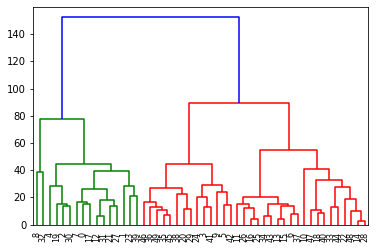


Do you want to re-execute the algorithm ? (yes / no): no

--------------------------------------------------------------------------------



In [ ]:
choicesOfDistance = ['Minimum Distance', 'Maximum Distance', 'Mean Distance', 'Average Distance']
while(True):
  print('Different Types Of Distance Measures: ')
  print('\t1. Minimum Distance')
  print('\t2. Maximum Distance')
  print('\t3. Mean Distance')
  print('\t4. Average Distance\n')
  choiceOfDistance = int(input('Which Distance Measure do you want to use ? '))
  while(True):
    if choiceOfDistance > 0 and choiceOfDistance < 5:
      break
    else:
      print('Invalid Choice!\n')
      choiceOfDistance = int(input('Which Distance Measure do you want to use ? '))
  print(f'You have chosen "{choicesOfDistance[choiceOfDistance-1]}" measure')
  clustersHeirarchy = agglomerativeClustering(usarrests, choiceOfDistance)
  print('\nHeirarchy:\n')
  pprint.pprint(clustersHeirarchy, indent=3)
  print('\nDendogram of the Clusters: ')
  method = None
  if choiceOfDistance == 1:
    method = 'single'
  elif choiceOfDistance == 2:
    method = 'complete'
  elif choiceOfDistance == 3:
    method = 'centroid'
  else:
    method = 'average'
  matrix = scipy.cluster.hierarchy.linkage(dataset_copy, method=method)
  scipy.cluster.hierarchy.dendrogram(matrix)
  plt.show()
  toReExecute = input('\nDo you want to re-execute the algorithm ? (yes / no): ')
  while(True):
    if toReExecute == 'yes':
      toReExecute = True
      break
    if toReExecute == 'no':
      toReExecute = False
      break
    else:
      print('Invalid Choice!\n')
      toReExecute = input('Which Distance Measure do you want to use ? (yes / no): ')
  print('\n--------------------------------------------------------------------------------\n')
  if toReExecute:
    continue
  else:
    break